# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data


Part 2: Data Inspection, Cleaning and Wrangling in Python

*Mark Bauer*

Table of Contents
=================

   * [Getting Started](#-Getting-Started:-Accessing-the-Building-Footprints-Dataset)
       * [Reading in data as csv in static form](##-Reading-in-data-as-csv-in-static-form)
       
       
   * [1. Importing Libraries](##-1.-Importing-Libraries)

       
   * [2. Reading in data as a pandas dataframe](#-2.-Reading-in-data-as-a-pandas-dataframe)
       
   
   * [3. Data Inspection](#-3.-Data-Inspection)
       * [3.1 Previewing Data](##-3.1-Previewing-Data)
       * [3.2 Calcualting Summary Statistics](##-3.2-Calcualting-Summary-Statistics)
       * [3.3 Identifying Null/NA Values](##-3.3-Identifying-Null/NA-Values)
       
       
   * [4. Data Cleaning/Wrangling](#-4.-Data-Cleaning/Wrangling)
       * [4.1 Previewing Column Values](##-4.1-Previewing-Column-Values)
       * [4.2 Filling In Null/NA Values With Median ](##-4.2-Filling-In-Null/NA-Values-With-Median)
       * [4.3 Plotting Histogram of Raw Construction Year Values](##-4.3-Plotting-Histogram-of-Raw-Construction-Year-Values)   
       * [4.4 Identiyfying Values Not Between Years 1 and 2020](##-4.4-Identiyfying-Values-Not-Between-Years-1-and-2020)
       * [4.5 Replacing Values Not Between Years 1 and 2020 with the Median](##-4.5-Replacing-Values-Not-Between-Years-1-and-2020-with-the-Median)
       * [4.6 Plotting Histogram of Construction Years Between 1 and 2020](##-4.6-Plotting-Histogram-of-Construction-Years-Between-1-and-2020)
       * [4.7 Identifying Buildings Built Before 1652 - Possible Outliers](##-4.7-Identifying-Buildings-Built-Before-1652---Possible-Outliers)
       * [4.8 Replacing Values Less Than 1652 with the Median](##-4.8-Replacing-Values-Less-Than-1652-with-the-Median)
       * [4.9 Plotting Histogram of Construction Years with Cleaned Column](##-4.9-Plotting-Histogram-of-Construction-Years-with-Cleaned-Column)
       
       
   * [5. Detecting Outliers](#-5.-Detecting-Outliers)
       * [5.1. Making a Box Plot](#-5.1-Making-a-Box-Plot)
           * [5.1.1 Calculating Interquartile Range (IQR)](##-5.1.1-Calculating-Interquartile-Range-(IQR))
           * [5.1.2 Box Plot of Construction Year Values](##-5.1.2-Box-Plot-of-Construction-Year-Values)
           * [5.1.3 Making Histograms of Values Above and Below Box Plot Whiskers](##-5.1.3-Making-Histograms-of-Values-Above-and-Below-Box-Plot-Whiskers)
       * [5.2 Z-Scores](#-5.2-Z-Scores)
           * [5.2.1 Calculating Z-Scores](##-5.2.1-Calculating-Z-Scores)
           * [5.2.2 Identifying Possible Outliers from Z-Score](##-5.2.2-Identifying-Possible-Outliers-from-Z-Score)
           * [5.2.3 Making Histograms of Construction Year Raw and Normalized (Z-Score) Values](##-5.2.3-Making-Histograms-of-Construction-Year-Raw-and-Normalized-%29Z-Score%29-Values)    
       
       
   * [6. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect any outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset

## Reading in data as csv in static form

Copy this link address shown below.

![building_footprints_csv](images/building-footprints-csv.png)

## Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

## Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%load_ext watermark

%watermark -v -p numpy,pandas,matplotlib.pyplot

CPython 3.7.1
IPython 7.18.1

numpy 1.19.1
pandas 1.0.0
matplotlib.pyplot 3.3.1


Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Reading in data as a pandas dataframe

If you receive `HTTPError: HTTP Error 404: Not Found`, you need to replace the csv link. DoITT changes the link path regularly.

In [4]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/2wbz-fb2h/rows.csv?accessType=DOWNLOAD'

# reading in our data as a pandas dataframe and setting the name to'building_footprints'
building_footprints = pd.read_csv(url)

# 3. Data Inspection

## 3.1 Previewing Data

In [5]:
# previewing the first five rows of our dataframe
building_footprints.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,2009.0,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3.044521e+09,3.044521e+09,Photogramm
1,1930.0,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4.030640e+09,4.030640e+09,Photogramm
2,1960.0,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4.139430e+09,4.139430e+09,Photogramm
3,1920.0,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3.049720e+09,3.049720e+09,Photogramm
4,1915.0,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3.055100e+09,3.055100e+09,Photogramm


In [6]:
# previewing the last five rows of our dataframe
building_footprints.tail()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084915,2020.0,3426817,MULTIPOLYGON (((-73.9643115080547 40.717425039...,NaN,10/06/2020 12:00:00 AM +0000,Constructed,1293196,85.0,2100.0,20.0,22993.524657,725.236588,3.023570e+09,NaN,Other (Man
1084916,2020.0,5174859,MULTIPOLYGON (((-74.06696583233064 40.59089916...,NaN,10/07/2020 12:00:00 AM +0000,Constructed,1293203,41.0,2100.0,14.0,7994.469625,411.769692,5.031220e+09,5.031220e+09,Other (Man
1084917,2020.0,3426084,MULTIPOLYGON (((-73.89604506258594 40.68196798...,NaN,10/06/2020 12:00:00 AM +0000,Constructed,1293198,29.0,2100.0,125.0,1160.154028,164.059000,3.038840e+09,3.038840e+09,Other (Man
1084918,2020.0,1091631,MULTIPOLYGON (((-73.97791985924005 40.74526931...,NaN,10/09/2020 12:00:00 AM +0000,Marked for Construction,1293206,350.0,5100.0,24.0,5713.879069,303.522270,1.009140e+09,1.009140e+09,Other (Man
1084919,2020.0,2129380,MULTIPOLYGON (((-73.81810674425817 40.84727909...,NaN,10/06/2020 12:00:00 AM +0000,Constructed,1293200,30.0,2100.0,22.0,1567.583216,168.896620,2.054160e+09,2.054160e+09,Other (Man


In [7]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_footprints.shape

(1084920, 15)

In [8]:
type(building_footprints)

pandas.core.frame.DataFrame

In [9]:
# printing the columns our dataframe
building_footprints.columns

Index(['CNSTRCT_YR', 'BIN', 'the_geom', 'NAME', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE'],
      dtype='object')

In [10]:
# printing the data types of our columns
building_footprints.dtypes

CNSTRCT_YR    float64
BIN             int64
the_geom       object
NAME           object
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL      float64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [11]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084920 entries, 0 to 1084919
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   CNSTRCT_YR  1080039 non-null  float64
 1   BIN         1084920 non-null  int64  
 2   the_geom    1084920 non-null  object 
 3   NAME        1752 non-null     object 
 4   LSTMODDATE  1084920 non-null  object 
 5   LSTSTATYPE  1084733 non-null  object 
 6   DOITT_ID    1084920 non-null  int64  
 7   HEIGHTROOF  1082256 non-null  float64
 8   FEAT_CODE   1084911 non-null  float64
 9   GROUNDELEV  1084392 non-null  float64
 10  SHAPE_AREA  1084920 non-null  float64
 11  SHAPE_LEN   1084920 non-null  float64
 12  BASE_BBL    1084918 non-null  float64
 13  MPLUTO_BBL  1084368 non-null  float64
 14  GEOMSOURCE  1084704 non-null  object 
dtypes: float64(8), int64(2), object(5)
memory usage: 124.2+ MB


In [12]:
building_footprints.dtypes.value_counts()

float64    8
object     5
int64      2
dtype: int64

In [13]:
building_footprints.index

RangeIndex(start=0, stop=1084920, step=1)

In [14]:
building_footprints['DOITT_ID'].is_unique

True

## 3.2 Calcualting Summary Statistics

In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [16]:
# printing descriptive statistics of our numeric columns in our data
building_footprints.describe()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1080039.000,1084920.000,1084920.000,1082256.000,1084911.000,1084392.000,1084920.000,1084920.000,1084918.000,1084368.000
mean,1946.642,3710175.717,590964.513,27.548,2698.573,55.099,1596.826,155.313,3562000260.428,3561844282.348
std,19243.391,1026804.560,359294.774,21.321,1202.251,41.509,5601.416,127.149,986061947.604,986086585.783
min,0.000,1000002.000,1.000,0.000,0.000,-14.000,32.475,23.737,3064269.000,3064269.000
25%,1920.000,3128598.750,286551.750,18.340,2100.000,25.000,652.086,109.693,3043180044.250,3043167529.750
50%,1930.000,4066824.500,573279.500,26.100,2100.000,46.000,957.230,137.920,4019290058.000,4019180092.500
75%,1955.000,4481736.250,861588.250,31.098,2100.000,74.000,1320.308,164.449,4106720009.500,4106690094.250
max,19999979.000,5799523.000,1293206.000,1550.000,5110.000,556.000,1171874.446,20017.293,5999999999.000,5999999999.000


In [17]:
# calculating the median value in each columns
# this can also be found with the describe method above at the 50% index/row
building_footprints.median()

CNSTRCT_YR         1930.000
BIN             4066824.500
DOITT_ID         573279.500
HEIGHTROOF           26.100
FEAT_CODE          2100.000
GROUNDELEV           46.000
SHAPE_AREA          957.230
SHAPE_LEN           137.920
BASE_BBL     4019290058.000
MPLUTO_BBL   4019180092.500
dtype: float64

In [18]:
building_footprints.loc[:, building_footprints.columns != 'DOITT_ID'].mode(numeric_only=True)

,CNSTRCT_YR,BIN,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
0,1920.000,4000000,30.000,2100.000,10.000,173.205,60.000,4163500400.000,4163500400.000


In [19]:
building_footprints.loc[:, building_footprints.columns != 'DOITT_ID'].mode(numeric_only=True).T

,0
CNSTRCT_YR,1920.000
BIN,4000000.000
HEIGHTROOF,30.000
FEAT_CODE,2100.000
GROUNDELEV,10.000
SHAPE_AREA,173.205
SHAPE_LEN,60.000
BASE_BBL,4163500400.000
MPLUTO_BBL,4163500400.000


In [20]:
# compute pairwise correlation of columns, excluding NA/null values
building_footprints.corr()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
CNSTRCT_YR,1.000,0.002,0.002,0.001,-0.001,0.001,-0.000,-0.001,0.002,0.002
BIN,0.002,1.000,0.156,-0.361,0.190,0.087,-0.101,-0.216,0.989,0.989
DOITT_ID,0.002,0.156,1.000,-0.177,0.551,-0.017,-0.038,-0.161,0.076,0.075
HEIGHTROOF,0.001,-0.361,-0.177,1.000,-0.364,-0.001,0.279,0.444,-0.330,-0.330
FEAT_CODE,-0.001,0.190,0.551,-0.364,1.000,0.001,-0.108,-0.311,0.089,0.089
GROUNDELEV,0.001,0.087,-0.017,-0.001,0.001,1.000,-0.020,-0.005,0.106,0.106
SHAPE_AREA,-0.000,-0.101,-0.038,0.279,-0.108,-0.020,1.000,0.785,-0.096,-0.096
SHAPE_LEN,-0.001,-0.216,-0.161,0.444,-0.311,-0.005,0.785,1.000,-0.191,-0.191
BASE_BBL,0.002,0.989,0.076,-0.330,0.089,0.106,-0.096,-0.191,1.000,1.000
MPLUTO_BBL,0.002,0.989,0.075,-0.330,0.089,0.106,-0.096,-0.191,1.000,1.000


In [21]:
building_footprints.T

,0,1,2,3,4,5,6,7,8,9,...,1084910,1084911,1084912,1084913,1084914,1084915,1084916,1084917,1084918,1084919
CNSTRCT_YR,2009.000,1930.000,1960.000,1920.000,1915.000,1950.000,1965.000,1935.000,2004.000,1910.000,...,2020.000,2020.000,2019.000,2020.000,2020.000,2020.000,2020.000,2020.000,2020.000,2020.000
BIN,3394646,4548330,4460479,3355684,3131737,4299828,4609623,4554786,3388445,3110799,...,1004377,3426086,3421372,3426439,3424693,3426817,5174859,3426084,1091631,2129380
the_geom,MULTIPOLYGON (((-73.87129515296562 40.65717370...,MULTIPOLYGON (((-73.87670970144625 40.71425234...,MULTIPOLYGON (((-73.85195485799383 40.66235471...,MULTIPOLYGON (((-73.94029215265738 40.64108287...,MULTIPOLYGON (((-73.98998983552244 40.62383804...,MULTIPOLYGON (((-73.7654951204543 40.611271914...,MULTIPOLYGON (((-73.85236537192253 40.75122838...,MULTIPOLYGON (((-73.71512875395307 40.73330867...,MULTIPOLYGON (((-73.94606707932263 40.66016319...,MULTIPOLYGON (((-73.94669293900293 40.64493688...,...,MULTIPOLYGON (((-73.98049301496157 40.72091279...,MULTIPOLYGON (((-73.89604579366434 40.68200134...,MULTIPOLYGON (((-73.89780276398484 40.66391978...,MULTIPOLYGON (((-73.94770260250746 40.70080692...,MULTIPOLYGON (((-73.87589160586263 40.68074641...,MULTIPOLYGON (((-73.9643115080547 40.717425039...,MULTIPOLYGON (((-74.06696583233064 40.59089916...,MULTIPOLYGON (((-73.89604506258594 40.68196798...,MULTIPOLYGON (((-73.97791985924005 40.74526931...,MULTIPOLYGON (((-73.81810674425817 40.84727909...
NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTMODDATE,08/22/2017 12:00:00 AM +0000,08/17/2017 12:00:00 AM +0000,08/22/2017 12:00:00 AM +0000,08/17/2017 12:00:00 AM +0000,08/22/2017 12:00:00 AM +0000,08/22/2017 12:00:00 AM +0000,08/17/2017 12:00:00 AM +0000,08/17/2017 12:00:00 AM +0000,08/22/2017 12:00:00 AM +0000,08/22/2017 12:00:00 AM +0000,...,10/08/2020 12:00:00 AM +0000,10/06/2020 12:00:00 AM +0000,10/06/2020 12:00:00 AM +0000,10/08/2020 12:00:00 AM +0000,10/06/2020 12:00:00 AM +0000,10/06/2020 12:00:00 AM +0000,10/07/2020 12:00:00 AM +0000,10/06/2020 12:00:00 AM +0000,10/09/2020 12:00:00 AM +0000,10/06/2020 12:00:00 AM +0000
LSTSTATYPE,Constructed,Constructed,Constructed,Constructed,Constructed,Constructed,Constructed,Constructed,Constructed,Constructed,...,Marked for Construction,Constructed,Constructed,Constructed,Constructed,Constructed,Constructed,Constructed,Marked for Construction,Constructed
DOITT_ID,1212853,1226227,581946,858061,568078,41210,1220055,1228515,1014893,757675,...,1293204,1293199,1293197,1293205,1292424,1293196,1293203,1293198,1293206,1293200
HEIGHTROOF,21.609,10.360,29.812,11.200,24.980,30.161,10.770,12.150,32.770,27.370,...,NaN,29.000,80.000,85.000,78.000,85.000,41.000,29.000,350.000,30.000
FEAT_CODE,2100.000,5110.000,2100.000,5110.000,2100.000,2100.000,5110.000,5110.000,2100.000,2100.000,...,1003.000,2100.000,2100.000,2100.000,2100.000,2100.000,2100.000,2100.000,5100.000,2100.000
GROUNDELEV,18.000,122.000,10.000,32.000,44.000,6.000,38.000,96.000,40.000,39.000,...,NaN,126.000,27.000,13.000,38.000,20.000,14.000,125.000,24.000,22.000


## 3.3 Identifying Null/NA Values

This is a *very important* step that is often overlooked. We don't want to perform any statistics on columns with null values.

In [22]:
# printing the number of null/na values in each column
building_footprints.isna().sum()

CNSTRCT_YR       4881
BIN                 0
the_geom            0
NAME          1083168
LSTMODDATE          0
LSTSTATYPE        187
DOITT_ID            0
HEIGHTROOF       2664
FEAT_CODE           9
GROUNDELEV        528
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            2
MPLUTO_BBL        552
GEOMSOURCE        216
dtype: int64

In [23]:
# printing the total amount of null/na values in our data
building_footprints.isnull().sum().sum()

1092207

# 4. Data Cleaning/Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## 4.1 Previewing Column Values

In [24]:
type(building_footprints['CNSTRCT_YR'])

pandas.core.series.Series

In [25]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
242965,0.000,4539821,MULTIPOLYGON (((-73.77552135849106 40.79488921...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,359561,46.800,2100.000,31.000,5023.538,345.741,4059170001.000,4059170001.000,Photogramm
284921,0.000,5115257,MULTIPOLYGON (((-74.146215162713 40.5700554040...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1216594,10.165,5110.000,38.000,339.869,79.749,5044670047.000,5044670047.000,Photogramm
583921,0.000,4616151,MULTIPOLYGON (((-73.76906604533796 40.70918866...,NaN,09/19/2017 12:00:00 AM +0000,Constructed,1195192,12.318,2100.000,52.000,820.012,116.108,4103530208.000,4103530208.000,Other (Man
30650,0.000,4542961,MULTIPOLYGON (((-73.94509337310036 40.75895518...,NaN,09/14/2017 12:00:00 AM +0000,Constructed,426228,22.760,2100.000,14.000,5293.033,311.754,4003570001.000,4003570001.000,Photogramm
284749,0.000,4572346,MULTIPOLYGON (((-73.72547066175497 40.74488322...,NaN,09/13/2013 12:00:00 AM +0000,Constructed,511197,17.130,2100.000,119.000,14371.072,543.614,4084010150.000,4084010150.000,Photogramm


In [26]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in descending order
building_footprints.sort_values('CNSTRCT_YR',ascending=False).head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1056575,19999979.000,5171292,MULTIPOLYGON (((-74.16106976376206 40.58166589...,NaN,01/22/2019 12:00:00 AM +0000,Constructed,1287742,43.530,2100.000,68.000,347.825,75.359,5024500240.000,5024507505.000,Other (Man
840992,20115.000,5165187,MULTIPOLYGON (((-74.144838646532 40.6162472403...,NaN,12/05/2019 12:00:00 AM +0000,Constructed,1291251,31.000,2100.000,40.000,1124.997,140.000,5004770044.000,5004770044.000,Other (Man
518182,20004.000,5018663,MULTIPOLYGON (((-74.13682929776881 40.61168969...,NaN,08/16/2019 12:00:00 AM +0000,Constructed,1288905,28.400,2100.000,89.000,702.366,127.117,5007350170.000,5007350170.000,Other (Man
743240,20000.000,1082416,MULTIPOLYGON (((-73.988920998115 40.7645846572...,NaN,03/09/2018 12:00:00 AM +0000,Alteration,97464,74.210,2100.000,52.000,3678.718,298.770,1010610027.000,1010610027.000,Other (Man
64079,20000.000,2129310,MULTIPOLYGON (((-73.90852861892834 40.82877161...,NaN,11/05/2018 12:00:00 AM +0000,Constructed,1285830,10.000,1000.000,32.000,373.099,86.566,2023880061.000,2023880061.000,Other (Man


In [27]:
building_footprints['CNSTRCT_YR'].describe().reset_index()

,index,CNSTRCT_YR
0,count,1080039.000
1,mean,1946.642
2,std,19243.391
3,min,0.000
4,25%,1920.000
5,50%,1930.000
6,75%,1955.000
7,max,19999979.000


In [28]:
building_footprints['CNSTRCT_YR'].mode().reset_index()

,index,0
0,0,1920.000


In [29]:
building_footprints['CNSTRCT_YR'].isnull().values.any()

True

In [30]:
# summing all the null/na values in our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

4881

In [31]:
# summing all the null/na values in our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].notnull().sum()

1080039

In [32]:
# summing all the null/na values in our 'CNSTRCT_YR' column
print((building_footprints['CNSTRCT_YR'].isna().sum()*100/len(building_footprints)).round(2),'%')

0.45 %


In [33]:
# summing all the null/na values in our 'CNSTRCT_YR' column
print((building_footprints['CNSTRCT_YR'].notnull().sum()*100/len(building_footprints)).round(2), '%')

99.55 %


# Identifying Outliers

Text(0.5, 1.0, 'Histogram of Construction Year Values')

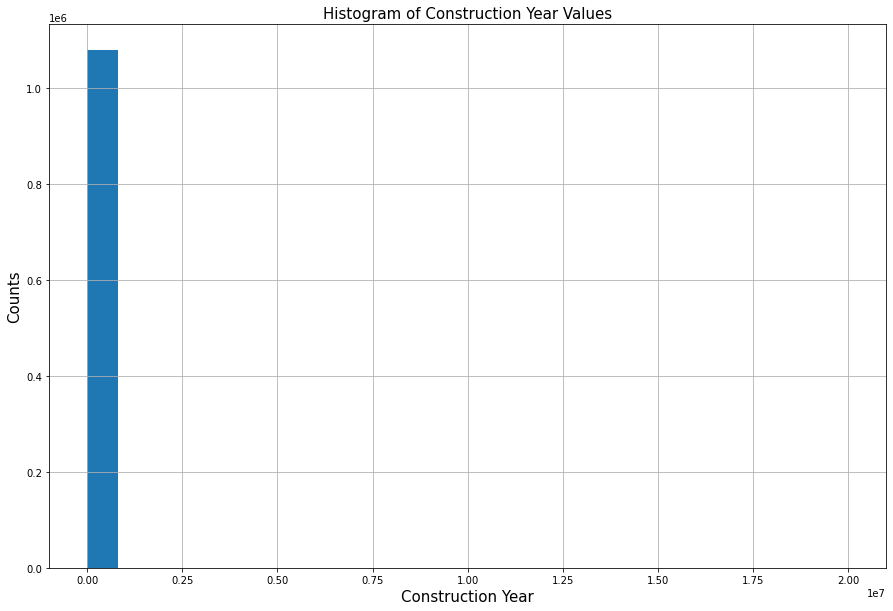

In [34]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10), bins=25)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

Text(0.5, 1.0, 'Histogram of Construction Year Values')

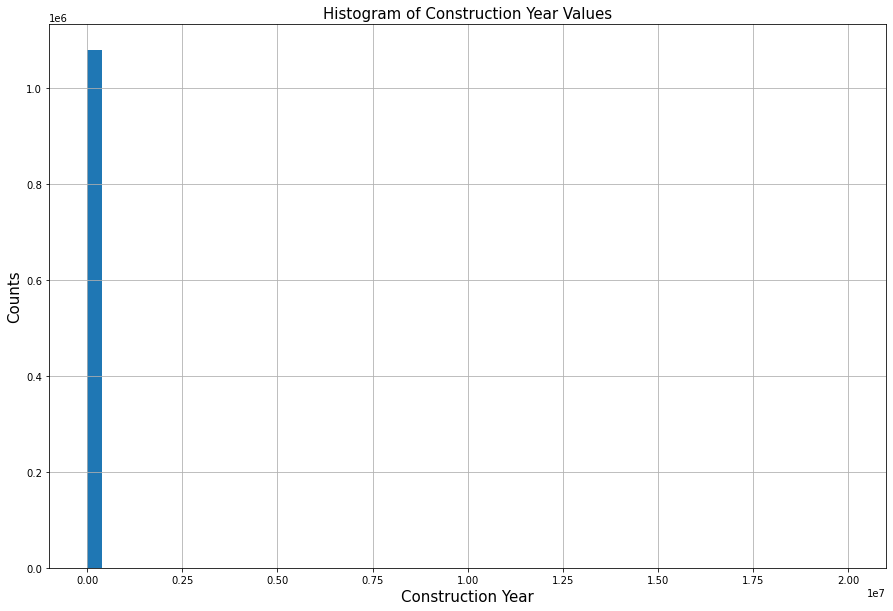

In [35]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10), bins=50)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [36]:
# return counts of unique values in descending order of our'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].value_counts()

1920.000        131436
1930.000        113697
1925.000        109687
1950.000         63001
1910.000         52935
                 ...  
202.000              1
1803.000             1
1809.000             1
1811.000             1
19999979.000         1
Name: CNSTRCT_YR, Length: 252, dtype: int64

In [37]:
# return counts of unique values but sorted by our index - 'CNSTRCT_YR' column values
building_footprints['CNSTRCT_YR'].value_counts().sort_index()

0.000           6141
202.000            1
1652.000           1
1661.000           2
1665.000           1
                ... 
2020.000         458
20000.000          2
20004.000          1
20115.000          1
19999979.000       1
Name: CNSTRCT_YR, Length: 252, dtype: int64

In [38]:
# return counts of unique values but sorted by our index - 'CNSTRCT_YR' column values
building_footprints['CNSTRCT_YR'].value_counts().sort_index(ascending=True).head(10)

0.000       6141
202.000        1
1652.000       1
1661.000       2
1665.000       1
1680.000       1
1690.000       1
1694.000       1
1706.000       2
1719.000       1
Name: CNSTRCT_YR, dtype: int64

In [39]:
# return counts of unique values but sorted by our index - 'CNSTRCT_YR' column values
building_footprints['CNSTRCT_YR'].value_counts().sort_index(ascending=False).head(10)

19999979.000       1
20115.000          1
20004.000          1
20000.000          2
2020.000         458
2019.000         801
2018.000        2049
2017.000        1866
2016.000        1743
2015.000        1034
Name: CNSTRCT_YR, dtype: int64

In [40]:
building_footprints.sort_values(by='CNSTRCT_YR').dropna(subset=['NAME']).head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084454,0.000,2118145,MULTIPOLYGON (((-73.88410300359251 40.80235670...,Building 131,08/12/2020 12:00:00 AM +0000,Constructed,462233,15.600,1004.000,12.000,7647.999,350.925,2027800002.000,2027800002.000,Other (Man
1035041,0.000,1083810,MULTIPOLYGON (((-73.96303731664047 40.78070299...,The Metropolitan Museum,08/22/2017 12:00:00 AM +0000,Constructed,120474,87.770,2100.000,100.000,481865.279,4606.613,1011110001.000,1011110001.000,Photogramm
683045,0.000,1083622,MULTIPOLYGON (((-73.9907346786451 40.752624973...,New York Telephone Compa*,08/22/2017 12:00:00 AM +0000,Constructed,95063,219.683,2100.000,39.000,17008.123,543.573,1007850049.000,1007850049.000,Photogramm
1057184,0.000,1036153,MULTIPOLYGON (((-73.97469476302562 40.75070858...,Mobil Building,01/22/2019 12:00:00 AM +0000,Constructed,279381,568.090,2100.000,37.000,81658.778,1227.267,1012960046.000,1012967502.000,Photogramm
1058535,0.000,1022579,MULTIPOLYGON (((-73.98587426277128 40.75510240...,Newsweek Building,01/22/2019 12:00:00 AM +0000,Constructed,509650,219.820,2100.000,56.000,19544.812,736.283,1009940054.000,1009947502.000,Photogramm


In [41]:
building_footprints[building_footprints.CNSTRCT_YR > 0].sort_values(by='CNSTRCT_YR').dropna(subset=['NAME']).head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1079212,1652.000,3221967,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540,2100.000,14.000,2214.189,208.884,3079170009.000,3079170009.000,Photogramm
801721,1661.000,4113403,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120,2100.000,64.000,2814.439,242.381,4050130006.000,4050130006.000,Photogramm
1083750,1680.000,5087656,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,04/13/2020 12:00:00 AM +0000,Constructed,702698,38.640,2100.000,38.000,2051.849,181.231,5078570090.000,5078570090.000,Photogramm
1083759,1690.000,5042188,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,04/13/2020 12:00:00 AM +0000,Alteration,806241,22.260,2100.000,21.000,2643.247,249.018,5028300049.000,5028300049.000,Photogramm
567781,1719.000,1078965,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,01/28/2020 12:00:00 AM +0000,Constructed,299639,47.830,2100.000,7.000,2521.723,263.058,1000070035.000,1000070035.000,Photogramm


In [42]:
building_footprints[building_footprints.CNSTRCT_YR > 0].sort_values(by='CNSTRCT_YR').dropna(subset=['NAME']).head(1)

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1079212,1652.000,3221967,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540,2100.000,14.000,2214.189,208.884,3079170009.000,3079170009.000,Photogramm


In [43]:
building_footprints[building_footprints.CNSTRCT_YR > 0].sort_values(by='CNSTRCT_YR').dropna(subset=['NAME']).head(1).T

,1079212
CNSTRCT_YR,1652.000
BIN,3221967
the_geom,MULTIPOLYGON (((-73.92083460429942 40.64439765...
NAME,Pieter Claesen Wyckoff House
LSTMODDATE,01/28/2020 12:00:00 AM +0000
LSTSTATYPE,Constructed
DOITT_ID,550741
HEIGHTROOF,24.540
FEAT_CODE,2100.000
GROUNDELEV,14.000


In [44]:
building_footprints[building_footprints.CNSTRCT_YR < 1].sort_values(by='CNSTRCT_YR').dropna(subset=['NAME']).head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
723892,0.000,1004350,MULTIPOLYGON (((-73.973538271636 40.7264685500...,Manhattan Pumping Station,08/22/2017 12:00:00 AM +0000,Constructed,266156,107.019,2100.000,9.000,17100.962,637.272,1003670025.000,1003670025.000,Other (Man
714739,0.000,1083621,MULTIPOLYGON (((-73.99020239051326 40.75240074...,New York Telephone Compa*,08/22/2017 12:00:00 AM +0000,Constructed,775248,160.660,2100.000,39.000,16470.978,532.578,1007850049.000,1007850049.000,Photogramm
683045,0.000,1083622,MULTIPOLYGON (((-73.9907346786451 40.752624973...,New York Telephone Compa*,08/22/2017 12:00:00 AM +0000,Constructed,95063,219.683,2100.000,39.000,17008.123,543.573,1007850049.000,1007850049.000,Photogramm
808660,0.000,1082908,MULTIPOLYGON (((-73.99354971485617 40.75110707...,Madison Square Garden,08/22/2017 12:00:00 AM +0000,Constructed,831086,145.640,2100.000,35.000,179912.149,1887.376,1007810001.000,1007810001.000,Photogramm
1035041,0.000,1083810,MULTIPOLYGON (((-73.96303731664047 40.78070299...,The Metropolitan Museum,08/22/2017 12:00:00 AM +0000,Constructed,120474,87.770,2100.000,100.000,481865.279,4606.613,1011110001.000,1011110001.000,Photogramm


In [45]:
name_no_year = building_footprints[building_footprints.CNSTRCT_YR < 1].sort_values(by='CNSTRCT_YR').dropna(subset=['NAME'])

name_no_year.NAME.value_counts()

New York Telephone Compa*              2
Barretto Point Park-BUILDING           1
Rosewood Playground-Comfort Station    1
Vidalia Park-Comfort Station           1
Mobil Building                         1
Building 126                           1
Newsweek Building                      1
Delacorte Theater                      1
Siemens Building                       1
building                               1
MetLife Building                       1
Building 131                           1
Building 115                           1
3412609                                1
Building 127                           1
Two Penn Plaza                         1
Soundview Field House                  1
The Metropolitan Museum                1
Grand Central Terminal                 1
Saint Patrick's R.C. School            1
Manhattan Pumping Station              1
Madison Square Garden                  1
203                                    1
Name: NAME, dtype: int64

In [46]:
name_no_year.NAME.value_counts().reset_index()

,index,NAME
0,New York Telephone Compa*,2
1,Barretto Point Park-BUILDING,1
2,Rosewood Playground-Comfort Station,1
3,Vidalia Park-Comfort Station,1
4,Mobil Building,1
5,Building 126,1
6,Newsweek Building,1
7,Delacorte Theater,1
8,Siemens Building,1
9,building,1


In [47]:
len(name_no_year)

24

# Construction Year 1652 as first building

In [48]:
building_footprints[~building_footprints['CNSTRCT_YR'].between(1652, 2020)]['CNSTRCT_YR'].unique()

array([0.0000000e+00,           nan, 2.0000000e+04, 2.0004000e+04,
       2.0115000e+04, 1.9999979e+07, 2.0200000e+02])

In [49]:
unique_values = building_footprints[~building_footprints['CNSTRCT_YR'].between(1652, 2020)]['CNSTRCT_YR'].unique()

print(*unique_values, sep='\n')

0.0
nan
20000.0
20004.0
20115.0
19999979.0
202.0


In [50]:
unique_values_sorted = np.sort(unique_values)

print(*unique_values_sorted, sep='\n')

0.0
202.0
20000.0
20004.0
20115.0
19999979.0
nan


In [51]:
building_footprints[~building_footprints['CNSTRCT_YR'].between(1652, 2020)]['CNSTRCT_YR'].nunique()

6

In [52]:
building_footprints[~building_footprints['CNSTRCT_YR'].between(1652, 2020)]['CNSTRCT_YR'].value_counts()

0.000           6141
20000.000          2
202.000            1
20115.000          1
19999979.000       1
20004.000          1
Name: CNSTRCT_YR, dtype: int64

In [53]:
building_footprints[~building_footprints['CNSTRCT_YR'].between(1652, 2020)]['CNSTRCT_YR'].value_counts().sort_index()

0.000           6141
202.000            1
20000.000          2
20004.000          1
20115.000          1
19999979.000       1
Name: CNSTRCT_YR, dtype: int64

In [54]:
num_of_outliers = building_footprints[~building_footprints['CNSTRCT_YR'].between(1652, 2020)]['CNSTRCT_YR'].value_counts().sum()

print(num_of_outliers)

6147


In [55]:
print('Possible outliers: ' +  "{:,}".format(num_of_outliers))

Possible outliers: 6,147


## 4.2 Replacing Outliers with Null/NA Values

One of my favorite pandas methods is `pd.to_numeric()`. We set `errors='coerce'` so any value that can not be converted to an integer returns 'NaN.' And then, you guest it, we can fill in these NaN values.

In [56]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

4881

In [57]:
# converting all the values in our 'CNSTRCT_YR' column as integers
# invalid conversions will be set as NaN with errors='coerce'
pd.to_numeric(building_footprints['CNSTRCT_YR'], downcast='integer', errors='coerce')

0         2009.000
1         1930.000
2         1960.000
3         1920.000
4         1915.000
            ...   
1084915   2020.000
1084916   2020.000
1084917   2020.000
1084918   2020.000
1084919   2020.000
Name: CNSTRCT_YR, Length: 1084920, dtype: float64

In [58]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

4881

In [59]:
# printing the mean and median of the 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].mean())
print(building_footprints['CNSTRCT_YR'].median())

1946.6424573557067
1930.0


In [60]:
# identifying values not between 1 and 2020 and saving as the name 'replace'
replace = building_footprints[~building_footprints['CNSTRCT_YR'].between(1652, 2020)]

building_footprints[['CNSTRCT_YR']] = building_footprints[['CNSTRCT_YR']].replace(replace, np.nan)

In [61]:
building_footprints[~building_footprints['CNSTRCT_YR'].between(1652, 2020)]['CNSTRCT_YR'].value_counts()

Series([], Name: CNSTRCT_YR, dtype: int64)

In [62]:
print(building_footprints['CNSTRCT_YR'].max())
print(building_footprints['CNSTRCT_YR'].min())

2020.0
1652.0


In [63]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

11028

## 4.2 Dropping Null/NA Values

In [64]:
len(building_footprints)

1084920

In [65]:
len(building_footprints.dropna(subset=['CNSTRCT_YR']))

1073892

In [66]:
len(building_footprints) - len(building_footprints.dropna(subset=['CNSTRCT_YR']))

11028

In [67]:
print('Dropping ' + \
      ("{:,}".format(len(building_footprints) - \
                     len(building_footprints.dropna(subset=['CNSTRCT_YR'])))) \
      + ' (or '
      + ("{:,.2f}".format((len(building_footprints) - \
                          len(building_footprints.dropna(subset=['CNSTRCT_YR'])))/len(building_footprints)))
      + '% of total) nulls from dataset.')

Dropping 11,028 (or 0.01% of total) nulls from dataset.


In [68]:
building_footprints_dropna = building_footprints.dropna(subset=['CNSTRCT_YR'])
len(building_footprints_dropna)

1073892

In [69]:
building_footprints_dropna.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,2009.000,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.609,2100.000,18.000,854.662,125.080,3044520815.000,3044520815.000,Photogramm
1,1930.000,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360,5110.000,122.000,217.594,60.226,4030640041.000,4030640041.000,Photogramm
2,1960.000,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.812,2100.000,10.000,946.427,123.142,4139430001.000,4139430001.000,Photogramm
3,1920.000,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200,5110.000,32.000,248.678,63.941,3049720006.000,3049720006.000,Photogramm
4,1915.000,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980,2100.000,44.000,1163.228,165.609,3055100055.000,3055100055.000,Photogramm


In [70]:
print(pd.Timestamp.min)
print(pd.Timestamp.max)

1677-09-21 00:12:43.145225
2262-04-11 23:47:16.854775807


Text(0.5, 1.0, 'Histogram of Construction Year Values')

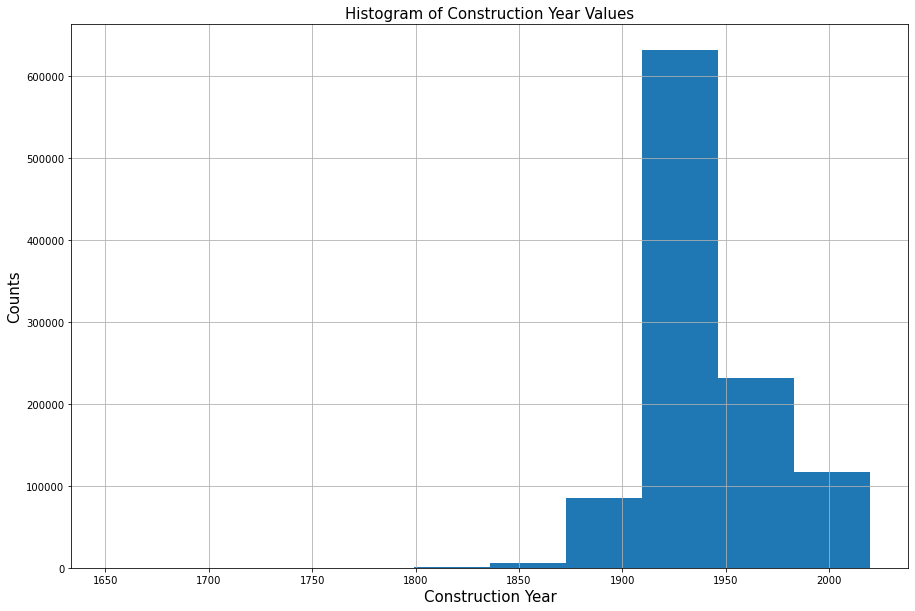

In [71]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints_dropna['CNSTRCT_YR'].hist(bins=10, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

Text(0.5, 1.0, 'Histogram of Construction Year Values')

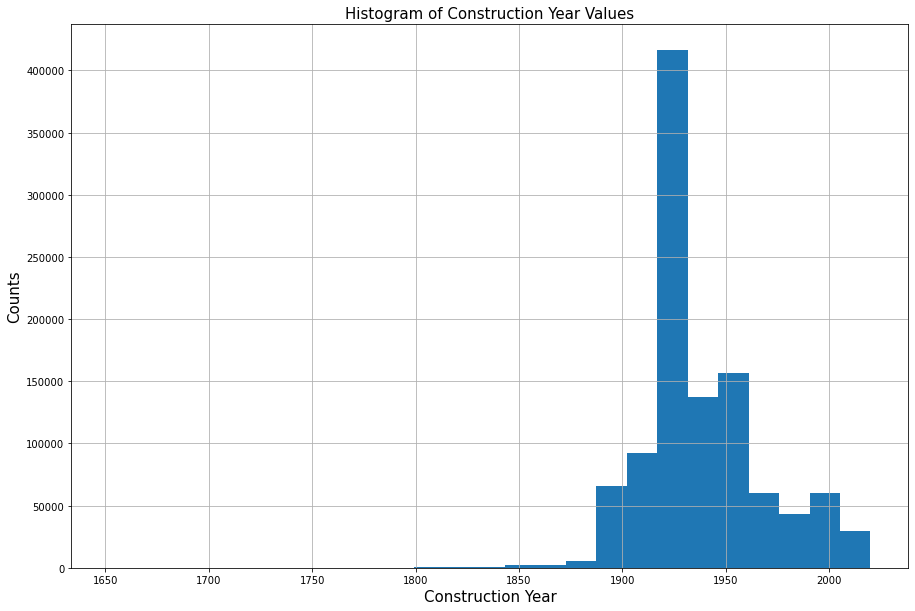

In [72]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
building_footprints_dropna['CNSTRCT_YR'].hist(bins=25, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [73]:
g = building_footprints_dropna.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()
g.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
g.set_index('CNSTRCT_YR', drop=False, inplace=True)
g.index = g.index.astype('int64')

g.head()

,CNSTRCT_YR,count
1652,1652.000,1
1661,1661.000,2
1665,1665.000,1
1680,1680.000,1
1690,1690.000,1


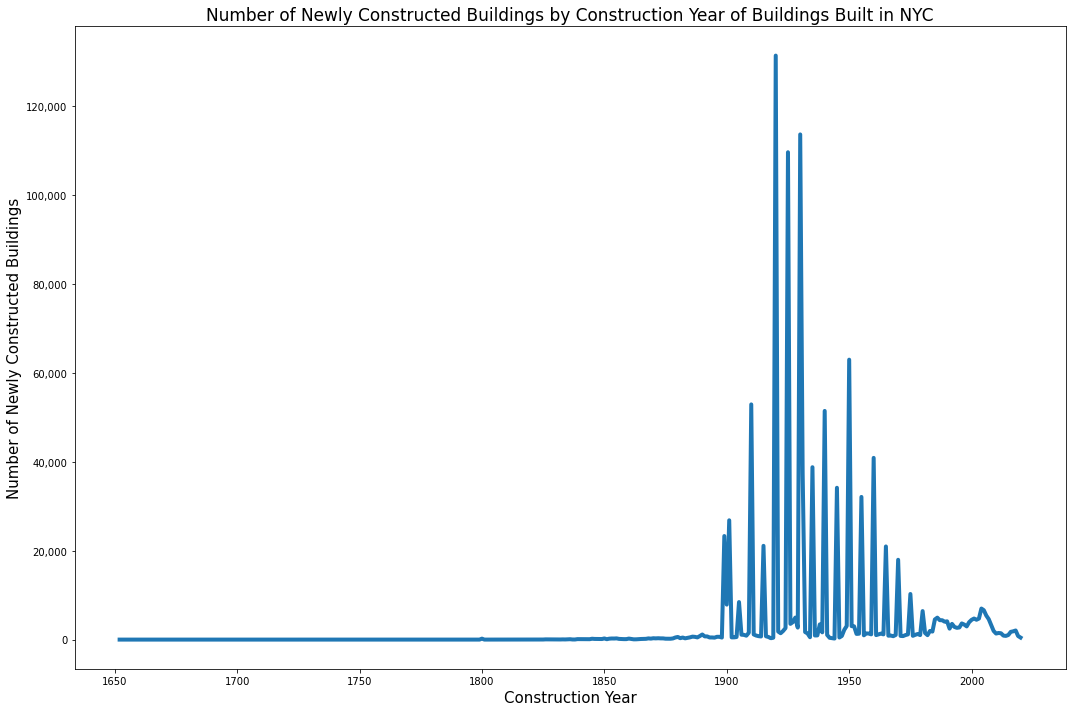

In [74]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g['count'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built in NYC',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

In [75]:
g[g['CNSTRCT_YR'] > 1900]['count']

1901    26851
1902      501
1903      506
1904      579
1905     8448
        ...  
2016     1743
2017     1866
2018     2049
2019      801
2020      458
Name: count, Length: 120, dtype: int64

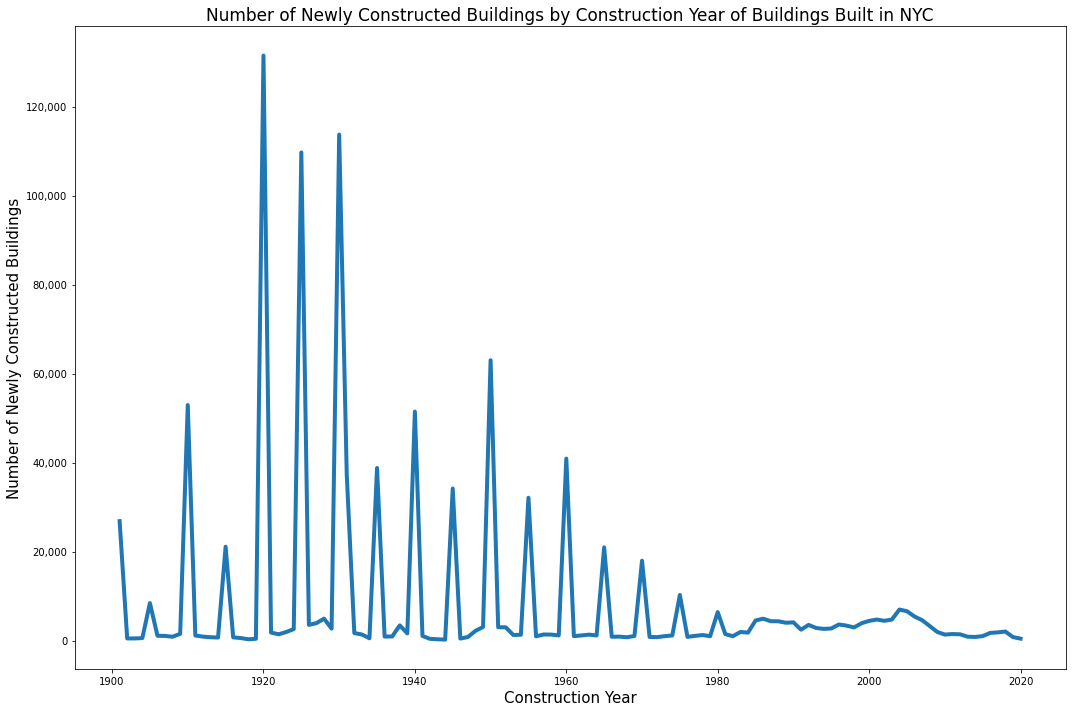

In [76]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g[g['CNSTRCT_YR'] > 1900]['count'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built in NYC',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

In [77]:
g.head()

,CNSTRCT_YR,count
1652,1652.000,1
1661,1661.000,2
1665,1665.000,1
1680,1680.000,1
1690,1690.000,1


In [78]:
g['cumsum'] = g['count'].cumsum()

In [79]:
g.head()

,CNSTRCT_YR,count,cumsum
1652,1652.000,1,1
1661,1661.000,2,3
1665,1665.000,1,4
1680,1680.000,1,5
1690,1690.000,1,6


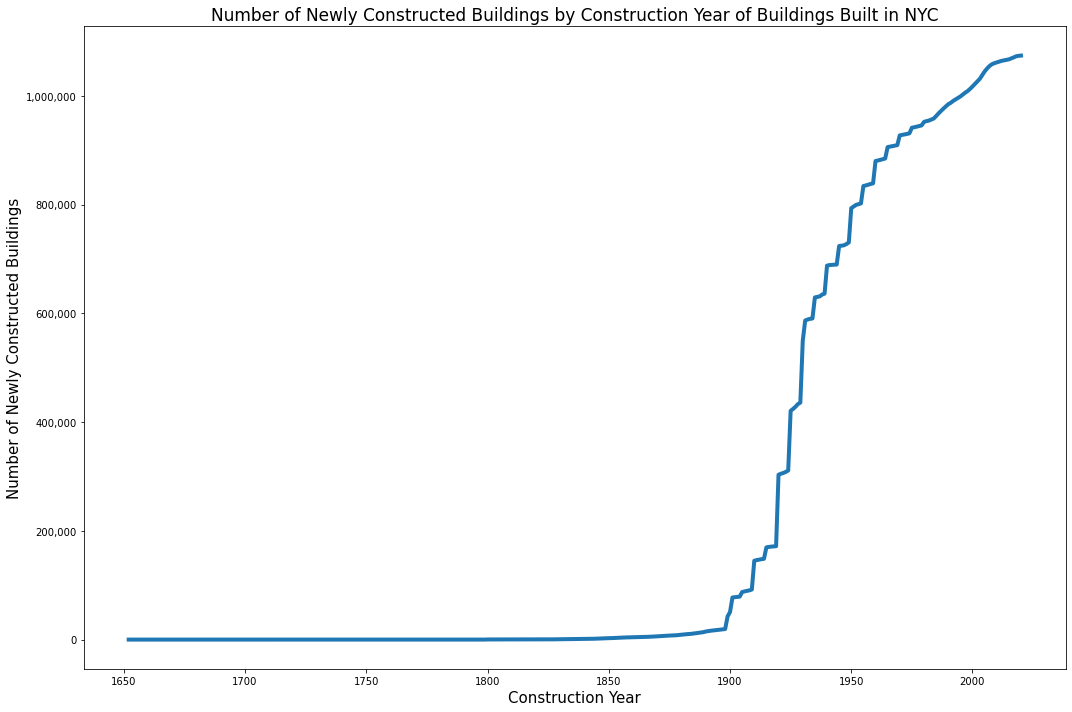

In [80]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g['cumsum'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built in NYC',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

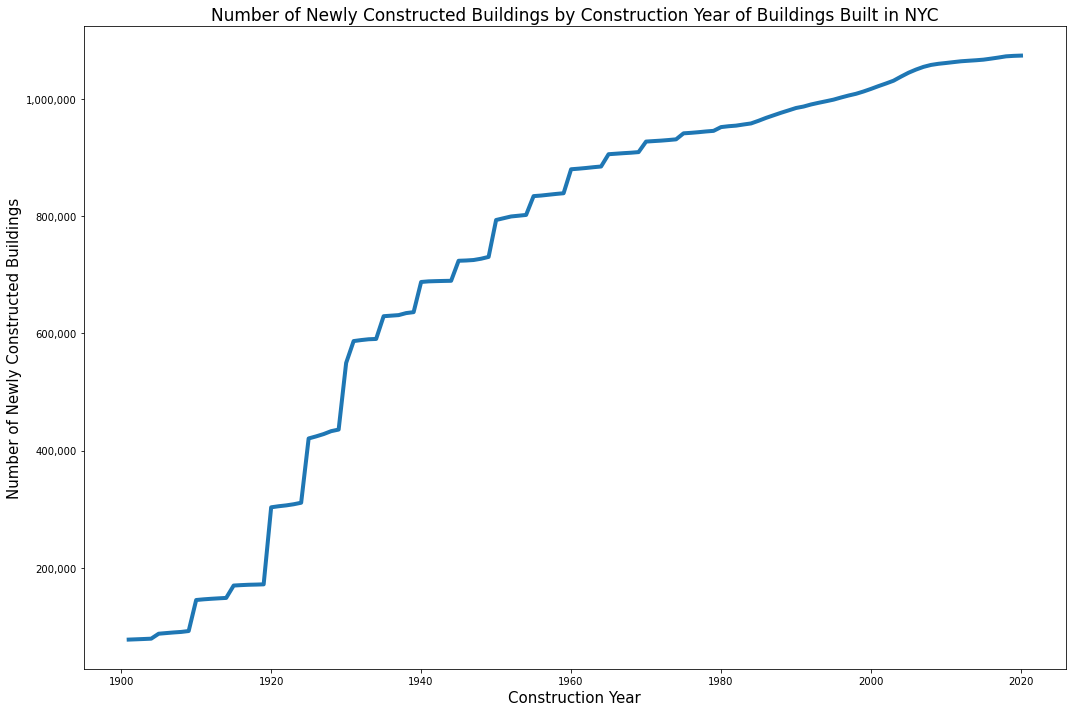

In [81]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g[g['CNSTRCT_YR'] > 1900]['cumsum'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built in NYC',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

## 4.2 Filling In Null/NA Values With Median 

In [82]:
building_footprints.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,2009.000,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.609,2100.000,18.000,854.662,125.080,3044520815.000,3044520815.000,Photogramm
1,1930.000,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360,5110.000,122.000,217.594,60.226,4030640041.000,4030640041.000,Photogramm
2,1960.000,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.812,2100.000,10.000,946.427,123.142,4139430001.000,4139430001.000,Photogramm
3,1920.000,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200,5110.000,32.000,248.678,63.941,3049720006.000,3049720006.000,Photogramm
4,1915.000,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980,2100.000,44.000,1163.228,165.609,3055100055.000,3055100055.000,Photogramm


In [83]:
building_footprints_fill_median = building_footprints.sort_values(by='CNSTRCT_YR')

In [84]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_footprints_fill_median['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_footprints_fill_median["CNSTRCT_YR"] = building_footprints_fill_median["CNSTRCT_YR"].fillna(value=median)
building_footprints_fill_median.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1079212,1652.000,3221967,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540,2100.000,14.000,2214.189,208.884,3079170009.000,3079170009.000,Photogramm
801721,1661.000,4113403,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120,2100.000,64.000,2814.439,242.381,4050130006.000,4050130006.000,Photogramm
482994,1661.000,4610542,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,1190137,14.847,5110.000,63.000,571.058,112.945,4050130006.000,4050130006.000,Photogramm
964742,1665.000,5130548,MULTIPOLYGON (((-74.06383185277687 40.61463876...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,160094,32.570,2100.000,38.000,3580.968,308.578,5028300049.000,5028300049.000,Photogramm
1083750,1680.000,5087656,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,04/13/2020 12:00:00 AM +0000,Constructed,702698,38.640,2100.000,38.000,2051.849,181.231,5078570090.000,5078570090.000,Photogramm


In [85]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints_fill_median['CNSTRCT_YR'].isna().sum()

0

In [86]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints_fill_median.sort_values('CNSTRCT_YR').head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1079212,1652.000,3221967,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540,2100.000,14.000,2214.189,208.884,3079170009.000,3079170009.000,Photogramm
801721,1661.000,4113403,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120,2100.000,64.000,2814.439,242.381,4050130006.000,4050130006.000,Photogramm
482994,1661.000,4610542,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,1190137,14.847,5110.000,63.000,571.058,112.945,4050130006.000,4050130006.000,Photogramm
964742,1665.000,5130548,MULTIPOLYGON (((-74.06383185277687 40.61463876...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,160094,32.570,2100.000,38.000,3580.968,308.578,5028300049.000,5028300049.000,Photogramm
1083750,1680.000,5087656,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,04/13/2020 12:00:00 AM +0000,Constructed,702698,38.640,2100.000,38.000,2051.849,181.231,5078570090.000,5078570090.000,Photogramm


In [87]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints_fill_median.sort_values('CNSTRCT_YR', ascending=False).head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1083638,2020.000,4615831,MULTIPOLYGON (((-73.7704471142095 40.717497582...,NaN,03/20/2020 12:00:00 AM +0000,Marked for Construction,1292340,nan,2100.000,135.000,181.952,61.739,4105090075.000,4105090075.000,Other (Man
1083633,2020.000,4615813,MULTIPOLYGON (((-73.77031294819673 40.71909755...,NaN,03/20/2020 12:00:00 AM +0000,Marked for Construction,1292334,nan,2100.000,140.000,1679.419,163.949,4105090056.000,4105090056.000,Other (Man
1083647,2020.000,2129534,MULTIPOLYGON (((-73.850860911115 40.8479458976...,NaN,06/25/2020 12:00:00 AM +0000,Marked for Construction,1292633,26.000,5100.000,76.000,825.008,140.000,2041060017.000,nan,Other (Man
1083650,2020.000,5171998,MULTIPOLYGON (((-74.13319010325726 40.57812092...,NaN,06/25/2020 12:00:00 AM +0000,Marked for Construction,1292636,30.000,5100.000,190.000,2000.001,180.000,5022670055.000,nan,Other (Man
1083651,2020.000,2129125,MULTIPOLYGON (((-73.91531521855829 40.81335708...,NaN,06/26/2020 12:00:00 AM +0000,Constructed,1292638,42.000,2100.000,16.000,3044.782,221.049,2022720109.000,2022720109.000,Other (Man


In [88]:
# printing descriptive statistics of our 'CNSTRCT_YR' column
building_footprints_fill_median['CNSTRCT_YR'].describe()

count   1084920.000
mean       1938.994
std          28.693
min        1652.000
25%        1920.000
50%        1930.000
75%        1955.000
max        2020.000
Name: CNSTRCT_YR, dtype: float64

In [89]:
# return counts of unique values in descending order of our'CNSTRCT_YR' column
building_footprints_fill_median['CNSTRCT_YR'].value_counts()

1920.000    131436
1930.000    124725
1925.000    109687
1950.000     63001
1910.000     52935
             ...  
1803.000         1
1789.000         1
1792.000         1
1793.000         1
1652.000         1
Name: CNSTRCT_YR, Length: 246, dtype: int64

In [90]:
# return counts of unique values of our 'CNSTRCT_YR' column sorted by 'CNSTRCT_YR'
building_footprints_fill_median['CNSTRCT_YR'].value_counts().sort_index()

1652.000       1
1661.000       2
1665.000       1
1680.000       1
1690.000       1
            ... 
2016.000    1743
2017.000    1866
2018.000    2049
2019.000     801
2020.000     458
Name: CNSTRCT_YR, Length: 246, dtype: int64

In [91]:
# printing descriptive statistics of our data 
building_footprints_fill_median.describe()

,CNSTRCT_YR,BIN,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1084920.000,1084920.000,1084920.000,1082256.000,1084911.000,1084392.000,1084920.000,1084920.000,1084918.000,1084368.000
mean,1938.994,3710175.717,590964.513,27.548,2698.573,55.099,1596.826,155.313,3562000260.428,3561844282.348
std,28.693,1026804.560,359294.774,21.321,1202.251,41.509,5601.416,127.149,986061947.604,986086585.783
min,1652.000,1000002.000,1.000,0.000,0.000,-14.000,32.475,23.737,3064269.000,3064269.000
25%,1920.000,3128598.750,286551.750,18.340,2100.000,25.000,652.086,109.693,3043180044.250,3043167529.750
50%,1930.000,4066824.500,573279.500,26.100,2100.000,46.000,957.230,137.920,4019290058.000,4019180092.500
75%,1955.000,4481736.250,861588.250,31.098,2100.000,74.000,1320.308,164.449,4106720009.500,4106690094.250
max,2020.000,5799523.000,1293206.000,1550.000,5110.000,556.000,1171874.446,20017.293,5999999999.000,5999999999.000


Text(0.5, 1.0, 'Histogram of Construction Year Values')

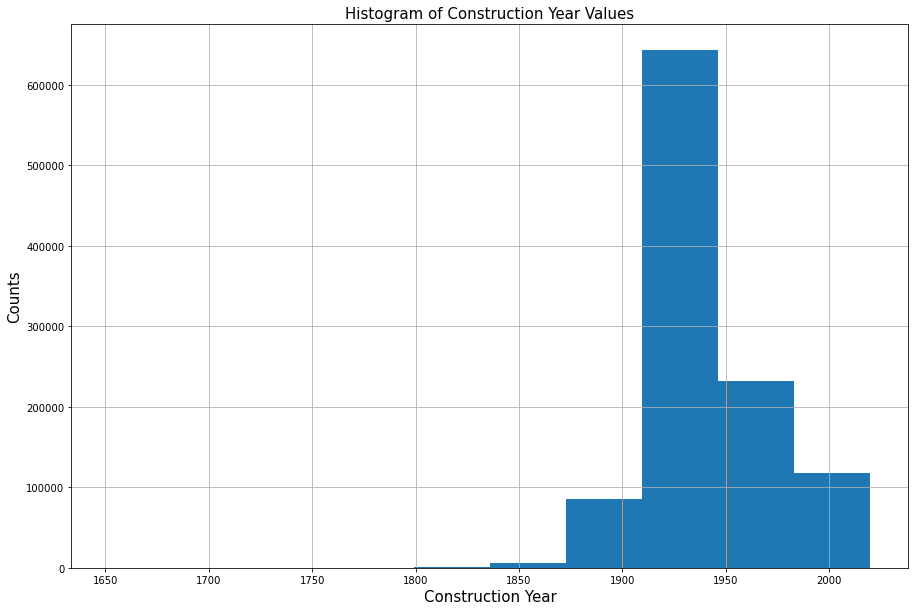

In [92]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints_fill_median['CNSTRCT_YR'].hist(bins=10, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

Text(0.5, 1.0, 'Histogram of Construction Year Values')

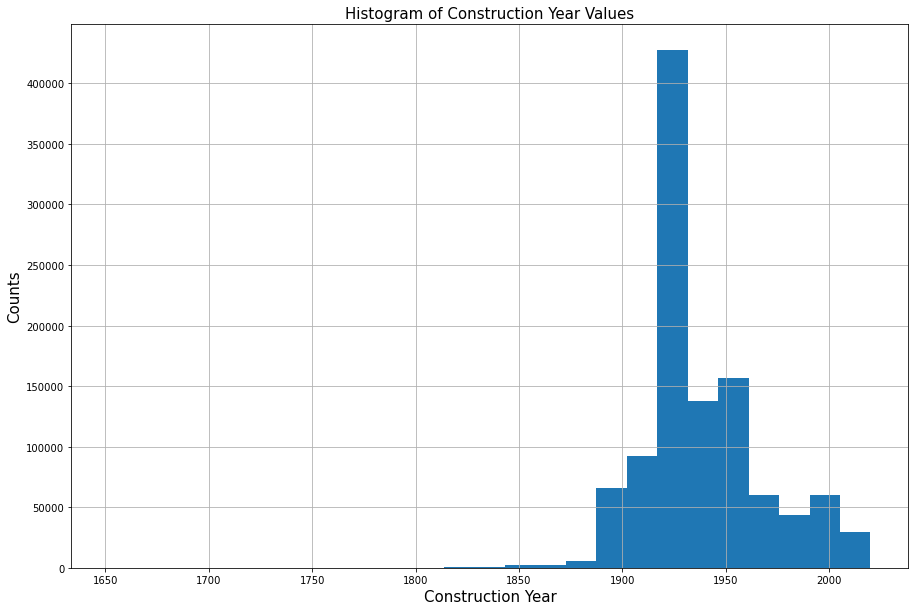

In [93]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
building_footprints_fill_median['CNSTRCT_YR'].hist(bins=25, figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

In [94]:
g = building_footprints_fill_median.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()
g.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
g.set_index('CNSTRCT_YR', drop=False, inplace=True)
g.index = g.index.astype('int64')

g.head()

,CNSTRCT_YR,count
1652,1652.000,1
1661,1661.000,2
1665,1665.000,1
1680,1680.000,1
1690,1690.000,1


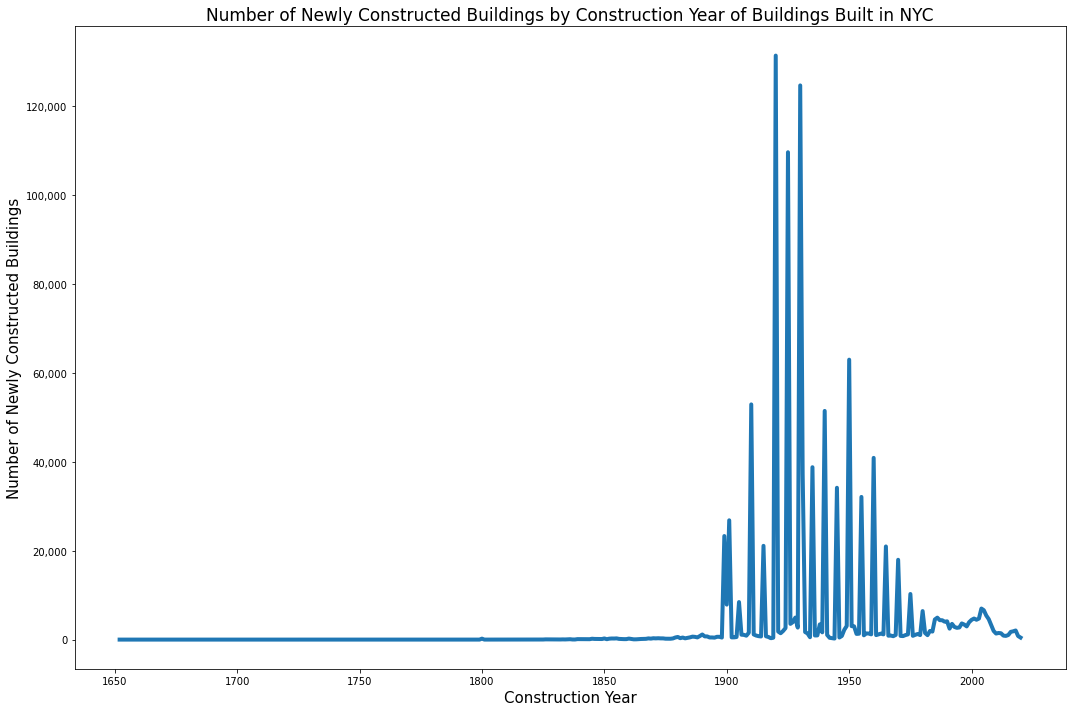

In [95]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g['count'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built in NYC',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

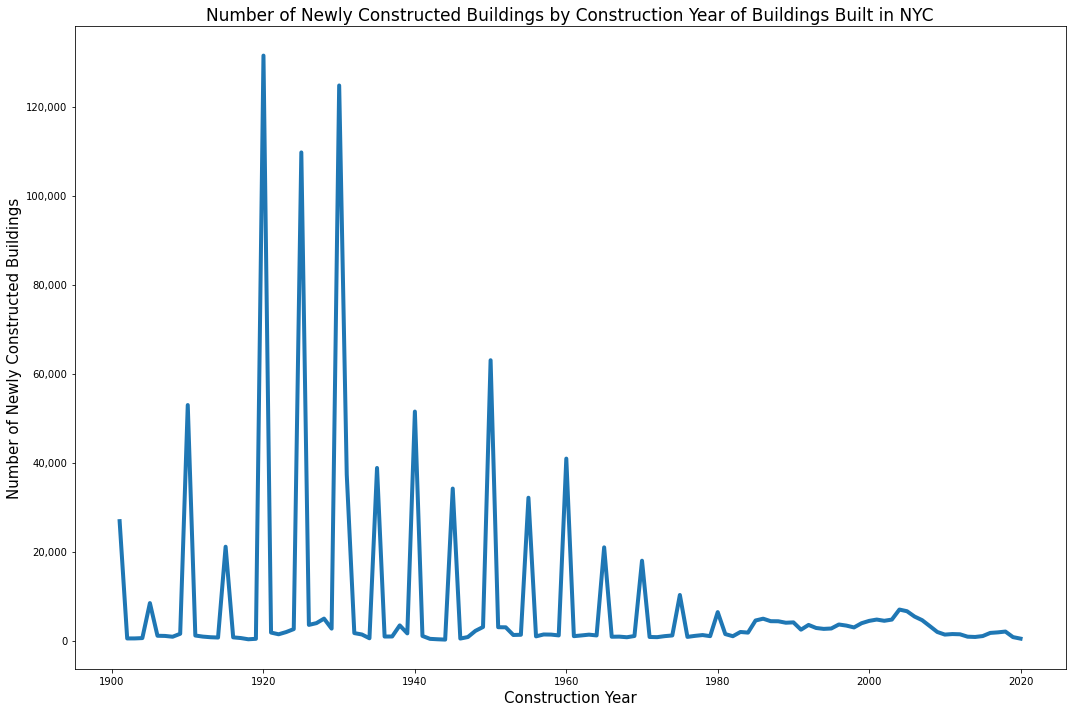

In [96]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g[g['CNSTRCT_YR'] > 1900]['count'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built in NYC',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

In [97]:
g.head()

,CNSTRCT_YR,count
1652,1652.000,1
1661,1661.000,2
1665,1665.000,1
1680,1680.000,1
1690,1690.000,1


In [98]:
g['cumsum'] = g['count'].cumsum()

In [99]:
g.head()

,CNSTRCT_YR,count,cumsum
1652,1652.000,1,1
1661,1661.000,2,3
1665,1665.000,1,4
1680,1680.000,1,5
1690,1690.000,1,6


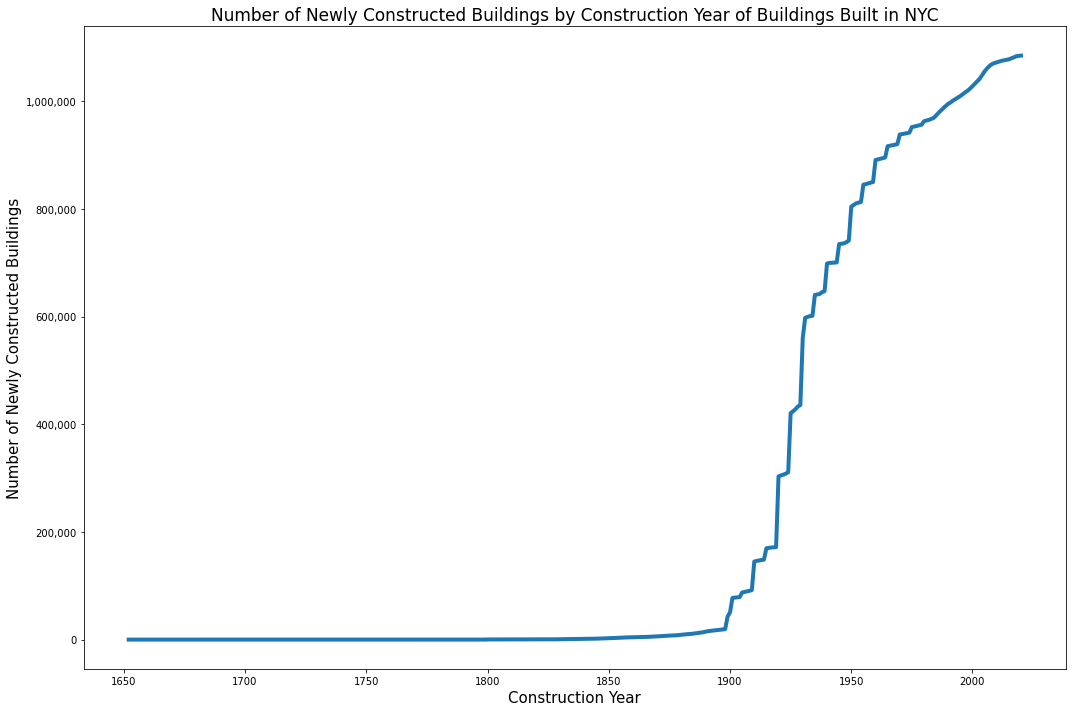

In [100]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g['cumsum'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built in NYC',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

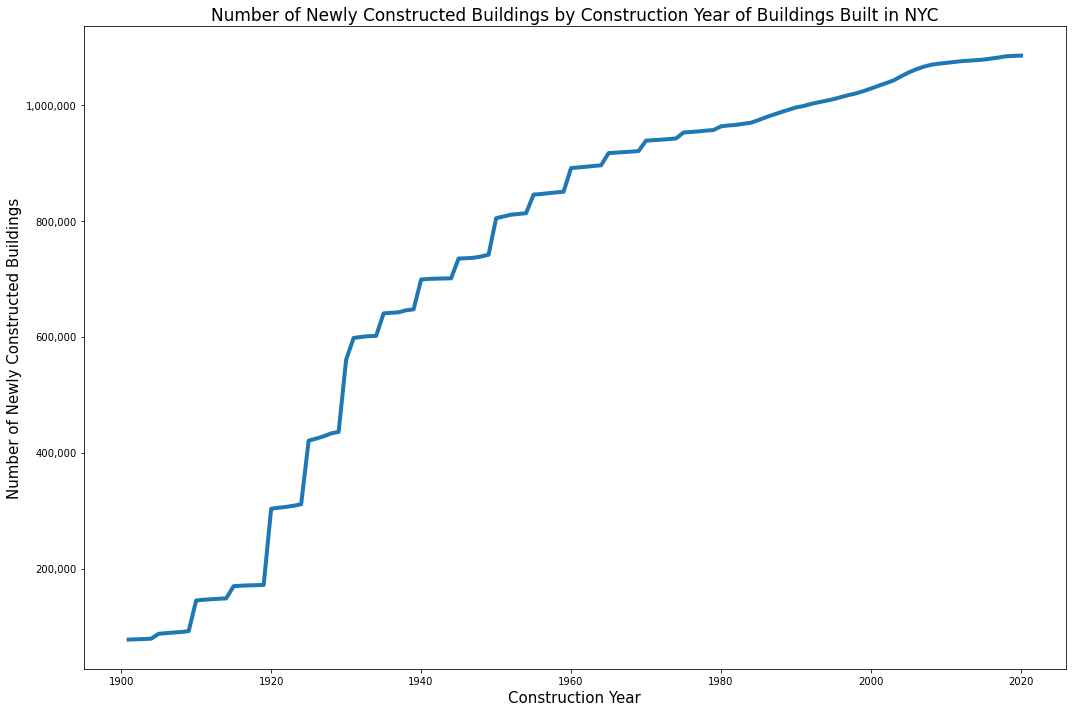

In [101]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g[g['CNSTRCT_YR'] > 1900]['cumsum'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built in NYC',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

## 5.1 Making a Box Plot

In [102]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/2wbz-fb2h/rows.csv?accessType=DOWNLOAD'

# reading in our data as a pandas dataframe and setting the name to'building_footprints'
building_footprints = pd.read_csv(url)

In [103]:
# previewing the first five rows of our dataframe
building_footprints.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,2009.000,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.609,2100.000,18.000,854.662,125.080,3044520815.000,3044520815.000,Photogramm
1,1930.000,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360,5110.000,122.000,217.594,60.226,4030640041.000,4030640041.000,Photogramm
2,1960.000,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.812,2100.000,10.000,946.427,123.142,4139430001.000,4139430001.000,Photogramm
3,1920.000,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,NaN,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200,5110.000,32.000,248.678,63.941,3049720006.000,3049720006.000,Photogramm
4,1915.000,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980,2100.000,44.000,1163.228,165.609,3055100055.000,3055100055.000,Photogramm


In [104]:
building_footprints.shape

(1084920, 15)

In [105]:
# converting all the values in our 'CNSTRCT_YR' column as integers
# invalid conversions will be set as NaN with errors='coerce'
pd.to_numeric(building_footprints['CNSTRCT_YR'], downcast='integer', errors='coerce')

0         2009.000
1         1930.000
2         1960.000
3         1920.000
4         1915.000
            ...   
1084915   2020.000
1084916   2020.000
1084917   2020.000
1084918   2020.000
1084919   2020.000
Name: CNSTRCT_YR, Length: 1084920, dtype: float64

Text(0.5, 1.0, 'Histogram of Construction Year Values')

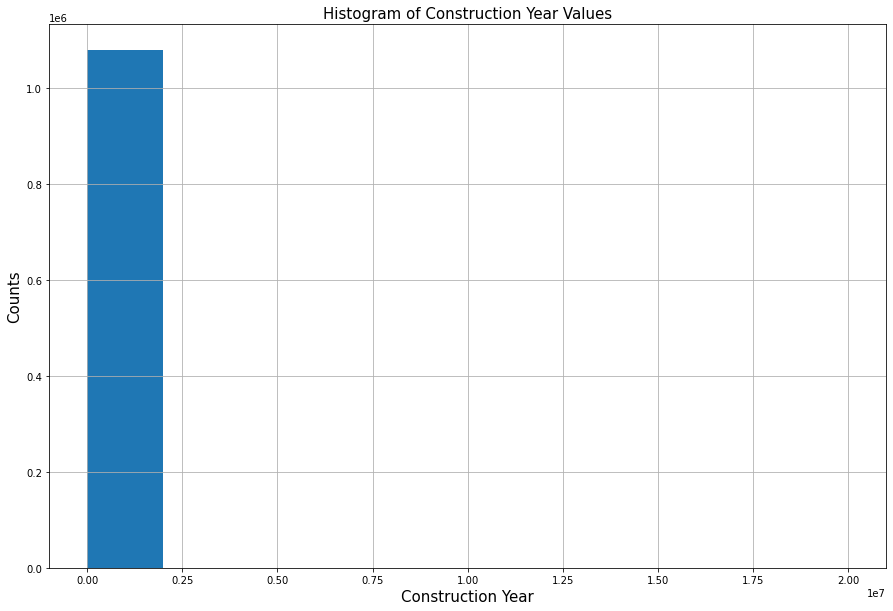

In [106]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

Text(0.5, 1.0, 'Histogram of Construction Year Values')

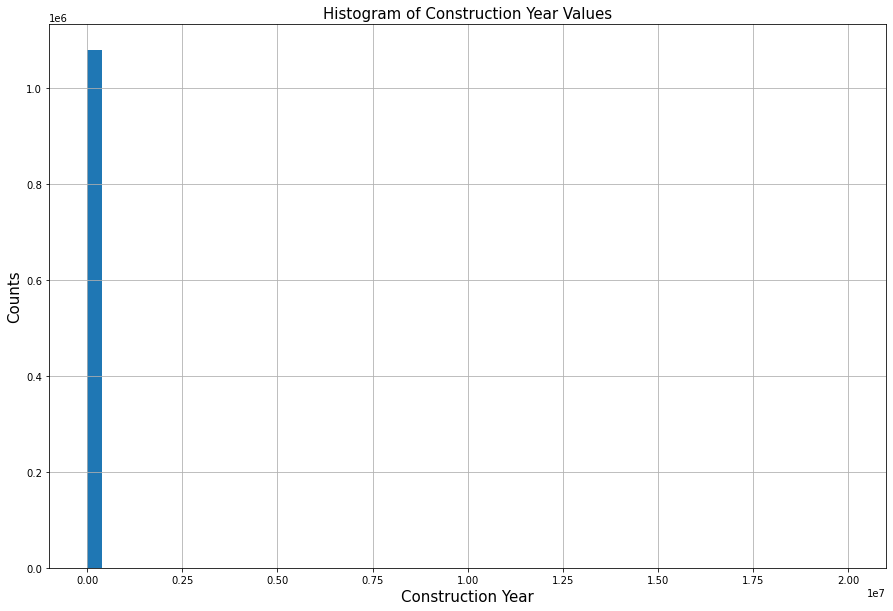

In [107]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10), bins=50)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

### 5.1.1 Calculating Interquartile Range (IQR)

In [108]:
# printing the 25% and 75% quantiles of our 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].quantile(0.25))
print(building_footprints['CNSTRCT_YR'].quantile(0.75))

1920.0
1955.0


In [109]:
# saving the 25% (i.e. Q1) and 75% (i.e. Q3) quantiles of our 'CNSTRCT_YR' column
Q1 = building_footprints['CNSTRCT_YR'].quantile(0.25)
Q3 = building_footprints['CNSTRCT_YR'].quantile(0.75)

# Computing the interquartile range (IQR)
IQR = Q3 - Q1

In [110]:
# printing the IQR of our 'CNSTRCT_YR' column
IQR

35.0

In [111]:
# printing the lower 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q1 - 1.5 * IQR))

# printing the upper 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q3 + 1.5 * IQR))

1867.5
2007.5


### 5.1.2 Box Plot of Construction Year Values

Text(0.5, 1.0, 'Box Plot of Construction Year Value')

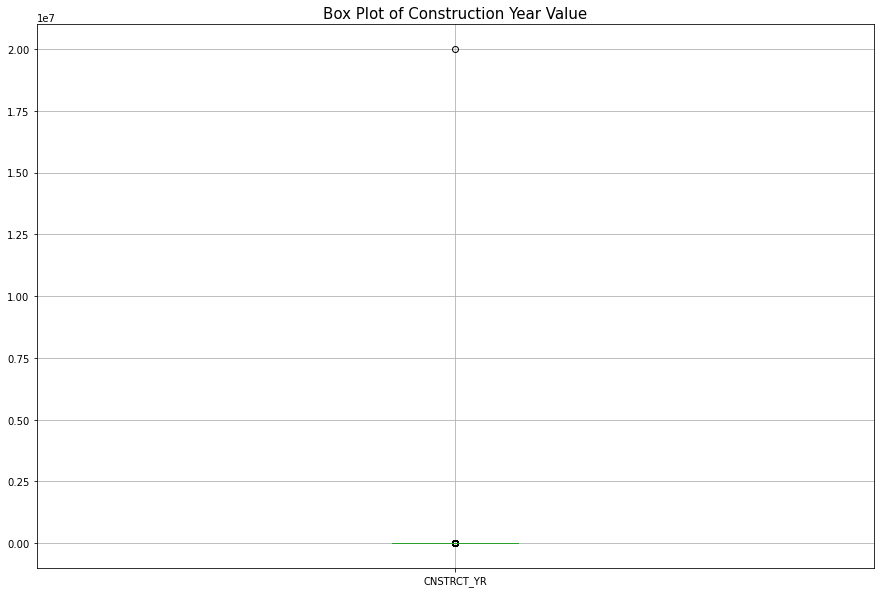

In [112]:
# making a box plot from our 'CNSTRCT_YR' column
CNSTRCT_YR_boxplot = building_footprints.boxplot(column=['CNSTRCT_YR'], figsize=(15,10))
plt.title('Box Plot of Construction Year Value', fontsize=15)

### 5.1.3 Making Histograms of Values Above and Below Box Plot Whiskers

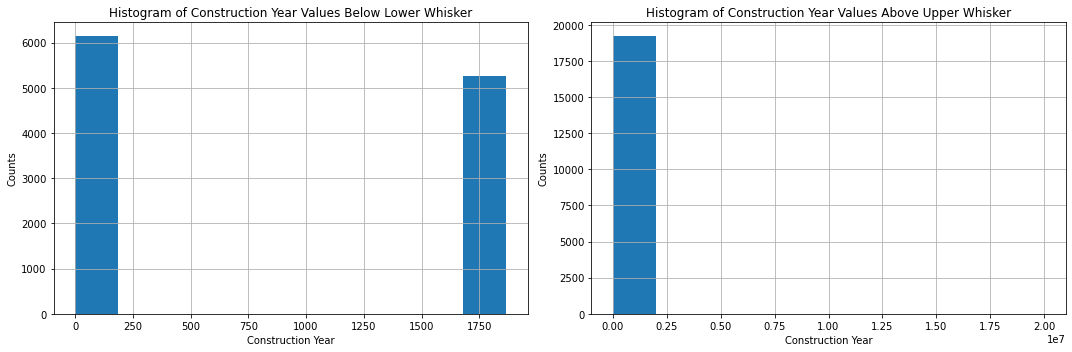

In [113]:
plt.figure(figsize=(15,5))

# identifying values lower than our lower whisker
floor = building_footprints[building_footprints.CNSTRCT_YR < (Q1 - 1.5 * IQR)] 

# identifying values higher than our upper whisker
ceiling = building_footprints[building_footprints.CNSTRCT_YR > (Q3 + 1.5 * IQR)]

#making histograms of these distributions
plt.subplot(121)
floor['CNSTRCT_YR'].hist()
plt.xlabel('Construction Year')
plt.ylabel('Counts')
plt.title('Histogram of Construction Year Values Below Lower Whisker')

plt.subplot(122)
ceiling['CNSTRCT_YR'].hist()
plt.xlabel('Construction Year')
plt.ylabel('Counts')
plt.title('Histogram of Construction Year Values Above Upper Whisker')

plt.tight_layout()

In [114]:
# return counts of unique values in descending order lower than our lower whisker
floor['CNSTRCT_YR'].value_counts()

0.000       6141
1855.000     271
1850.000     260
1853.000     248
1854.000     241
            ... 
1735.000       1
1720.000       1
1797.000       1
1811.000       1
1665.000       1
Name: CNSTRCT_YR, Length: 95, dtype: int64

In [115]:
# return counts of unique values lower than our lower whisker sorted by index (i.e. 'CNSTRCT_YR')
floor['CNSTRCT_YR'].value_counts().sort_index()

0.000       6141
202.000        1
1652.000       1
1661.000       2
1665.000       1
            ... 
1863.000      67
1864.000     108
1865.000     141
1866.000     152
1867.000     174
Name: CNSTRCT_YR, Length: 95, dtype: int64

In [116]:
# printing the unique values lower than our lower whisker
floor['CNSTRCT_YR'].sort_values().unique()

array([   0.,  202., 1652., 1661., 1665., 1680., 1690., 1694., 1706.,
       1719., 1720., 1722., 1725., 1729., 1735., 1747., 1750., 1758.,
       1765., 1766., 1775., 1779., 1785., 1789., 1792., 1793., 1795.,
       1797., 1799., 1800., 1801., 1802., 1803., 1804., 1807., 1808.,
       1809., 1810., 1811., 1812., 1813., 1814., 1815., 1816., 1817.,
       1818., 1819., 1820., 1821., 1822., 1823., 1824., 1825., 1826.,
       1827., 1828., 1829., 1830., 1831., 1832., 1833., 1834., 1835.,
       1836., 1837., 1838., 1839., 1840., 1841., 1842., 1843., 1844.,
       1845., 1846., 1847., 1848., 1849., 1850., 1851., 1852., 1853.,
       1854., 1855., 1856., 1857., 1858., 1859., 1860., 1861., 1862.,
       1863., 1864., 1865., 1866., 1867.])

In [117]:
# return counts of unique values in descending order greater than our upper whisker
ceiling['CNSTRCT_YR'].value_counts()

2008.000        3291
2018.000        2049
2009.000        1955
2017.000        1866
2016.000        1743
2011.000        1487
2012.000        1435
2010.000        1366
2015.000        1034
2013.000         897
2014.000         833
2019.000         801
2020.000         458
20000.000          2
20115.000          1
20004.000          1
19999979.000       1
Name: CNSTRCT_YR, dtype: int64

In [118]:
# return counts of unique values in descending order greater than our upper whisker
ceiling['CNSTRCT_YR'].value_counts().sort_index()

2008.000        3291
2009.000        1955
2010.000        1366
2011.000        1487
2012.000        1435
2013.000         897
2014.000         833
2015.000        1034
2016.000        1743
2017.000        1866
2018.000        2049
2019.000         801
2020.000         458
20000.000          2
20004.000          1
20115.000          1
19999979.000       1
Name: CNSTRCT_YR, dtype: int64

## 5.2. Z-Scores

### 5.2.1 Calculating Z-Scores

In [119]:
# calculating the z score of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR_zscore'] = (building_footprints.CNSTRCT_YR - building_footprints.CNSTRCT_YR.mean())/building_footprints.CNSTRCT_YR.std()

In [120]:
# making a separate dataframe with only the columns ['CNSTRCT_YR', 'CNSTRCT_YR_zscore']
CNSTRCT_YR_zscore = building_footprints[['CNSTRCT_YR', 'CNSTRCT_YR_zscore']]
CNSTRCT_YR_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
0,2009.000,0.003
1,1930.000,-0.001
2,1960.000,0.001
3,1920.000,-0.001
4,1915.000,-0.002


In [121]:
# sorting by CNSTRCT_YR_zscore in ascending order
CNSTRCT_YR_zscore.sort_values(by='CNSTRCT_YR_zscore')

,CNSTRCT_YR,CNSTRCT_YR_zscore
242965,0.000,-0.101
284921,0.000,-0.101
583921,0.000,-0.101
30650,0.000,-0.101
284749,0.000,-0.101
...,...,...
1084818,nan,nan
1084890,nan,nan
1084892,nan,nan
1084897,nan,nan


In [122]:
# sorting by CNSTRCT_YR_zscore in descending order
CNSTRCT_YR_zscore.sort_values(by='CNSTRCT_YR_zscore', ascending=False)

,CNSTRCT_YR,CNSTRCT_YR_zscore
1056575,19999979.000,1039.216
840992,20115.000,0.944
518182,20004.000,0.938
743240,20000.000,0.938
64079,20000.000,0.938
...,...,...
1084818,nan,nan
1084890,nan,nan
1084892,nan,nan
1084897,nan,nan


In [123]:
len(CNSTRCT_YR_zscore)

1084920

In [124]:
CNSTRCT_YR_zscore.dtypes

CNSTRCT_YR           float64
CNSTRCT_YR_zscore    float64
dtype: object

### 5.2.2 Identifying Possible Outliers from Z-Score

In [125]:
# returning values in 'CNSTRCT_YR_zscore' column not between -3 and 3
outside_zscore = CNSTRCT_YR_zscore[~CNSTRCT_YR_zscore['CNSTRCT_YR_zscore'].between(-3, 3, inclusive=True)]

In [126]:
# previewing first five rows 
outside_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
4943,nan,nan
45949,nan,nan
45955,nan,nan
46004,nan,nan
50349,nan,nan


In [127]:
# sorting values in 'CNSTRCT_YR_zscore' in ascending order
outside_zscore.sort_values(by='CNSTRCT_YR_zscore')

,CNSTRCT_YR,CNSTRCT_YR_zscore
1056575,19999979.000,1039.216
4943,nan,nan
45949,nan,nan
45955,nan,nan
46004,nan,nan
...,...,...
1084818,nan,nan
1084890,nan,nan
1084892,nan,nan
1084897,nan,nan


In [128]:
outside_zscore = outside_zscore.dropna(subset=['CNSTRCT_YR_zscore'])

In [129]:
# sorting values in 'CNSTRCT_YR_zscore' in descending order
outside_zscore.sort_values(by='CNSTRCT_YR_zscore', ascending=False)

,CNSTRCT_YR,CNSTRCT_YR_zscore
1056575,19999979.000,1039.216


In [130]:
# printing number of rows
len(outside_zscore)

1

### 5.2.3 Making Histograms of Construction Year Raw and Normalized (Z-Score) Values

In [131]:
CNSTRCT_YR_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
0,2009.000,0.003
1,1930.000,-0.001
2,1960.000,0.001
3,1920.000,-0.001
4,1915.000,-0.002


array([[<AxesSubplot:title={'center':'CNSTRCT_YR'}>,
        <AxesSubplot:title={'center':'CNSTRCT_YR_zscore'}>]], dtype=object)

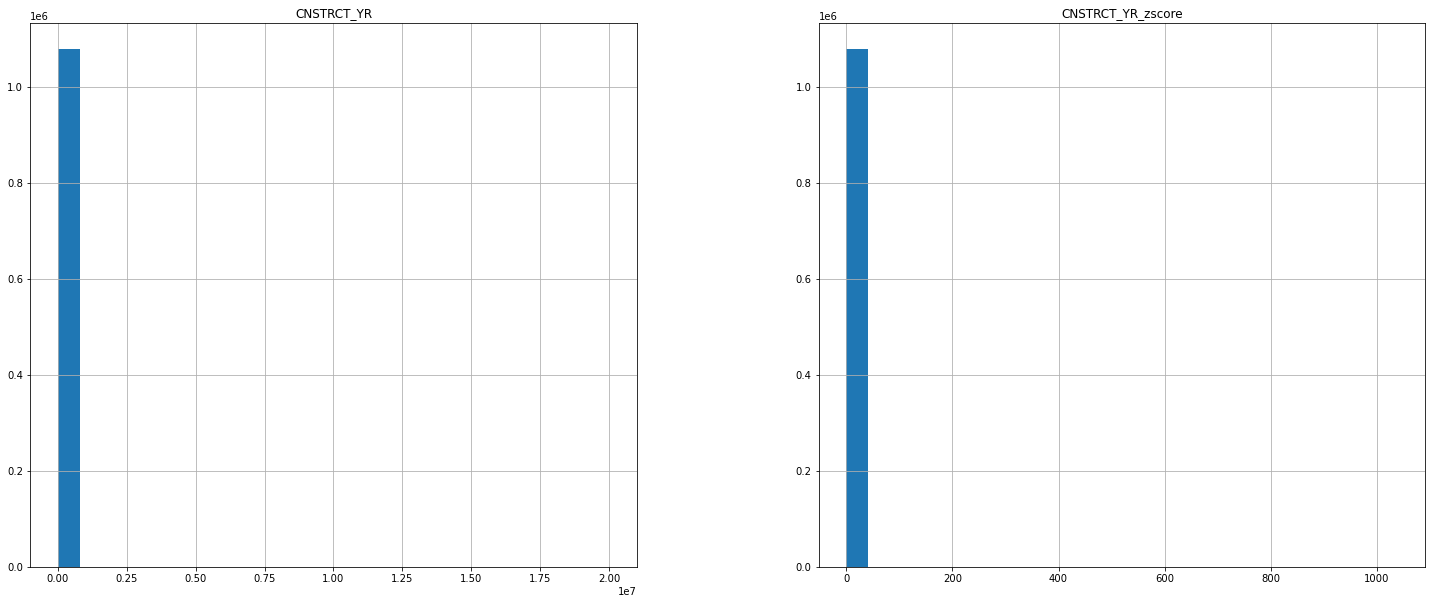

In [132]:
# making histograms of the distributions of both columns
CNSTRCT_YR_zscore.hist(bins=25, figsize=(25,10))

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect any outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots and z-scores. This step is crucial if you are interested in modeling or predicting future values.. In Part III, we will focus on data visualization.